W projekcie będę pracował na zbiorze: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

Plan pracy:
    Proces przetwarzania danych.
    Proces modelowania (znajdowania optymalnych parametrów).
    Porównanie modeli.
    Wizualizacja wyników.
    Podsumowanie pracy


### Naszym dane pochodzą z kampanii marketingowej portugalskiego banku. Będziemy konstruować modele pozwalające przewidzieć na podstawie danych klienta czy po rozmowie telefonicznej założy on lokatę terminową

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Wczytywanie danych ZMIANA DUPA

In [2]:
data = pd.read_csv('Data/bank-additional-full.csv', delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Przetwarzanie danych

Zmienne w naszych danych:
# Informacje z banku o kliencie:
1 - age (numeric)
2 - job : rodzaj pracy (kategorie: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - martial : status małżeński (kategorie: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : (kategorie: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: kredyt mieszkaniowy? (categorical: 'no','yes','unknown')
7 - loan: czy posiada pożyczki? (categorical: 'no','yes','unknown')
# Informacje powiązane z ostatnim kontaktem:
8 - contact: rodzaj kontaktu (categorical: 'cellular','telephone')
9 - month: miesiąc ostatniego kontaktu (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: dzień ostatniego kontaktu (categorical: 'mon','tue','wed','thu','fri')
11 - duration: czas trwania ostatniego kontaktu, w sekundach (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# Inne atrybuty:
12 - campaign: liczba kontaktów z danym klientem w trakcie trwania kampanii (numeric, includes last contact)
13 - pdays: liczba dni która upłynęła od ostatniego dnia kontaktu z klientem w trakcie kampanii (numeric; 999 means client was not previously contacted)
14 - previous: liczba kontaktów z danym klientem przed kampanią (numeric)
15 - poutcome: wynik poprzedniej kampanii marketingowej (categorical: 'failure','nonexistent','success')
# Socjoeknomiczne dane
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

# Wynik (desired target):
21 - y - Czy klient założył lokatę terminową? (binary: 'yes','no')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Jak widać, mamy wartości tekstowe. Przerobimy je na numeryczne.

In [4]:
for key in data:
    print(data[key].value_counts(), "" , sep="\n")

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950


Usuwamy rekordy z nieznanym atrybutem, a następnie każdemu zawodowi przypisujemy wartość numeryczną według subiektywnej oceny.

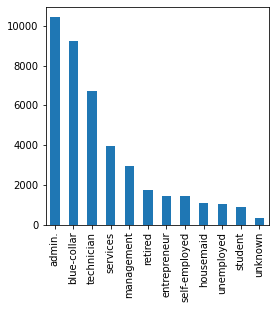

In [5]:
data["job"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data = data[data.job != "unknown"]

jobs = { 'entrepreneur':15,
        'management':6,
        'technician':6,
        'blue-collar':8,
        'admin.':6,
        'services':6,
        'self-employed':4,
        'housemaid':2,
        'retired':2,
        'student':4,
        'unemployed':-1,
         }

data.job = data.job.map(jobs);

Zamieńmy wartości no/yes na numeryczne 0/1 oraz usuwamy rekordy z nieznanymi wartościami

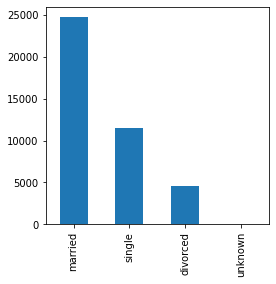

In [6]:
data["marital"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data = data[data.marital != "unknown"]

data["marital"] = data.marital.replace({"married":0, "single":1, "divorced":2})

Postępujemy identycznie jak z zawodami

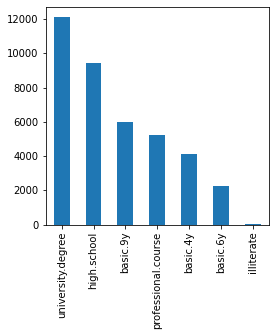

In [7]:
data = data[data.education != "unknown"]

data["education"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["education"] = data.education.replace({"basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "professional.course":5 , "university.degree": 6, "illiterate": -1})

Usuwamy rekordy z nieznaną wartością

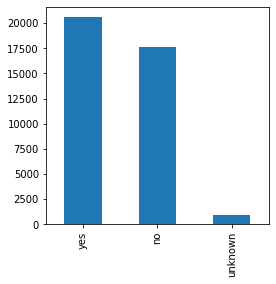

In [8]:
data["housing"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data = data[data.housing != "unknown"]

data["housing"] = data.housing.replace({"no":0, "yes":1})

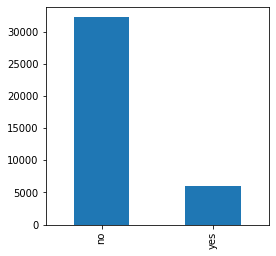

In [9]:
data["loan"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["loan"] = data.loan.replace({"no":0, "yes":1})

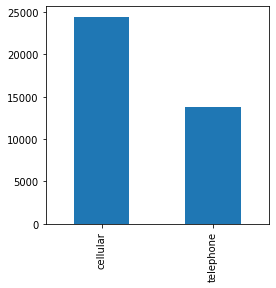

In [10]:
data["contact"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["contact"] = data.contact.replace({"cellular":0, "unknown":1, "telephone":2})

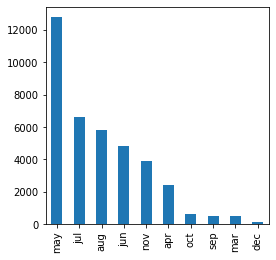

In [11]:
data["month"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()


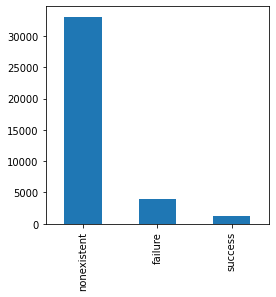

In [12]:
data["poutcome"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["poutcome"] = data.poutcome.replace({"nonexistent":0, "failure":1, "success":2})

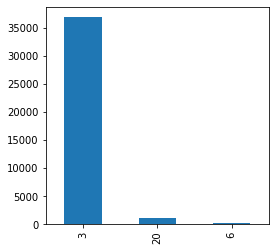

In [13]:
data["pdays"] = data["pdays"].apply(lambda x: 0 if x==-1 else(20 if 0<x<=10 else(6 if x<=20 else 3)))

data["pdays"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

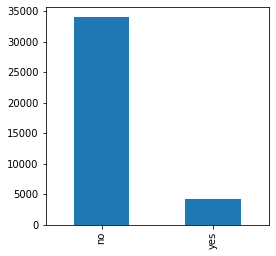

In [14]:
data["y"].value_counts().plot(kind="bar", figsize=(4,4))
plt.show()

data["y"] = data.y.replace({"no":0, "yes":1})

Usuwamy wiersze, które naszym zdaniem nie będą miały wpływu na ostateczny wynik (dzień i miesiąc kontaktu, default jest zawsze takie samo)

Ponieważ kolumna "duration" jest czasem trwania rozmowy telefonicznej ma ona bardzo duży wpływ na wyniki naszego modelu. Np. gdy równy jest 0s, to wynika z tego, że y=0. Jednocześnie poznajemy je po odbyciu rozmowy, czyli po poznaniu y, dlatego zgodnie z zaleceniami twórców danych pozbywamy się tej kolumny.

In [15]:
data.drop(['default', 'day_of_week', 'month', 'duration'], axis=1, inplace = True)

dataAll = data.copy()
class_1_over = data[data['y'] == 0].sample(len(data[data['y'] == 1]))
data = pd.concat([class_1_over, data[data['y'] == 1]], axis=0)
print(data["y"].value_counts())

0    4258
1    4258
Name: y, dtype: int64


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 16310 to 41186
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8516 non-null   int64  
 1   job             8516 non-null   int64  
 2   marital         8516 non-null   int64  
 3   education       8516 non-null   int64  
 4   housing         8516 non-null   int64  
 5   loan            8516 non-null   int64  
 6   contact         8516 non-null   int64  
 7   campaign        8516 non-null   int64  
 8   pdays           8516 non-null   int64  
 9   previous        8516 non-null   int64  
 10  poutcome        8516 non-null   int64  
 11  emp.var.rate    8516 non-null   float64
 12  cons.price.idx  8516 non-null   float64
 13  cons.conf.idx   8516 non-null   float64
 14  euribor3m       8516 non-null   float64
 15  nr.employed     8516 non-null   float64
 16  y               8516 non-null   int64  
dtypes: float64(5), int64(12)
mem

# Analiza danych

C:\Users\Pawla\AppData\Local\Temp\ipykernel_1576\2904949346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


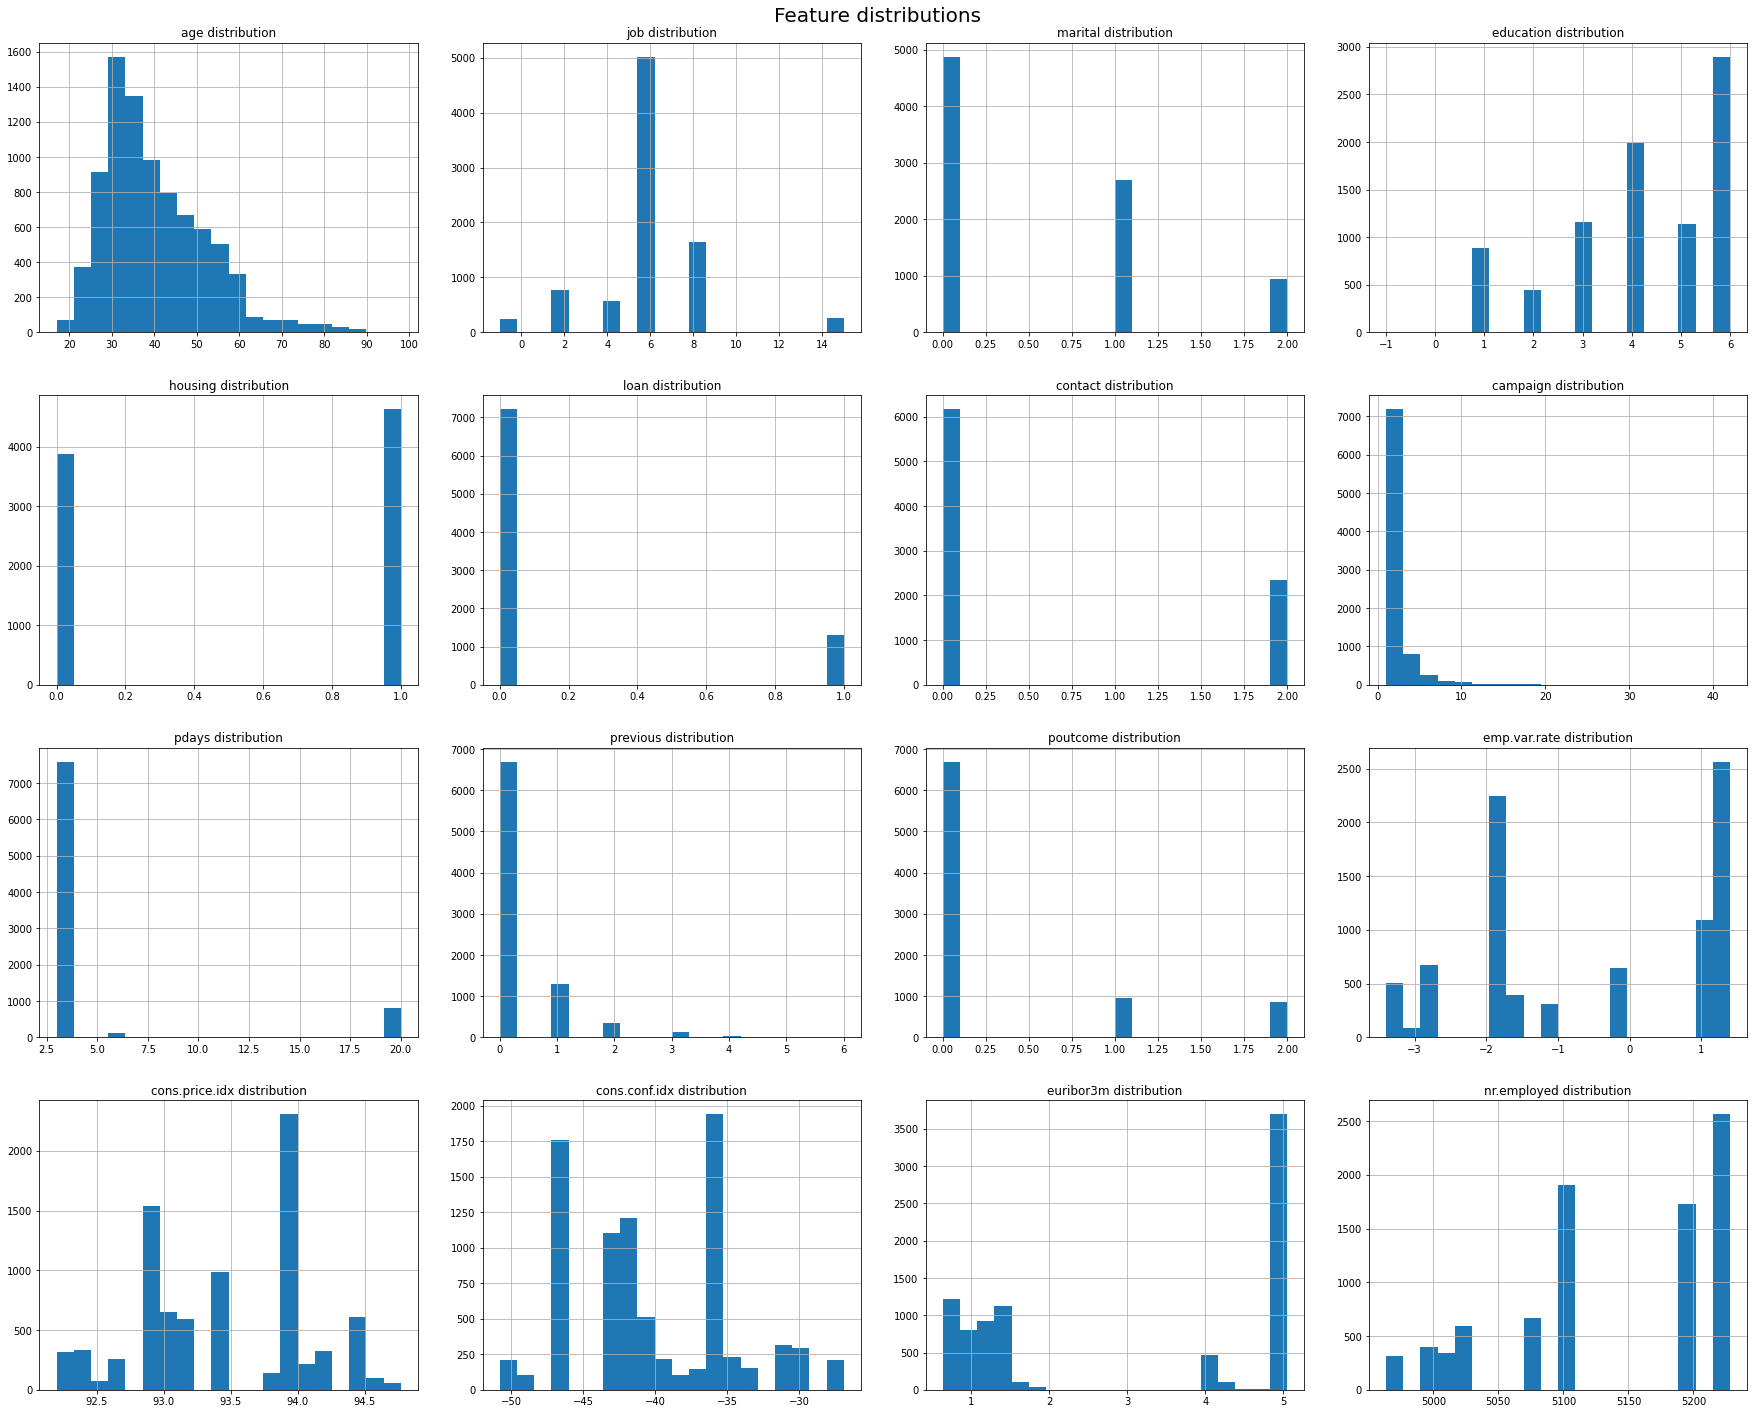

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(25,20))

i = 0
j = 0

for feature in list(data.columns[:-1]):
  data[feature].hist(bins=20,ax=axes[i,j])
  axes[i,j].set_title(feature + " distribution")
  j=j+1
  if j == 4:
    i=i+1
    j=0

fig.tight_layout(pad=3.0)
fig.suptitle("Feature distributions", fontsize=20, verticalalignment='bottom')
fig.show()


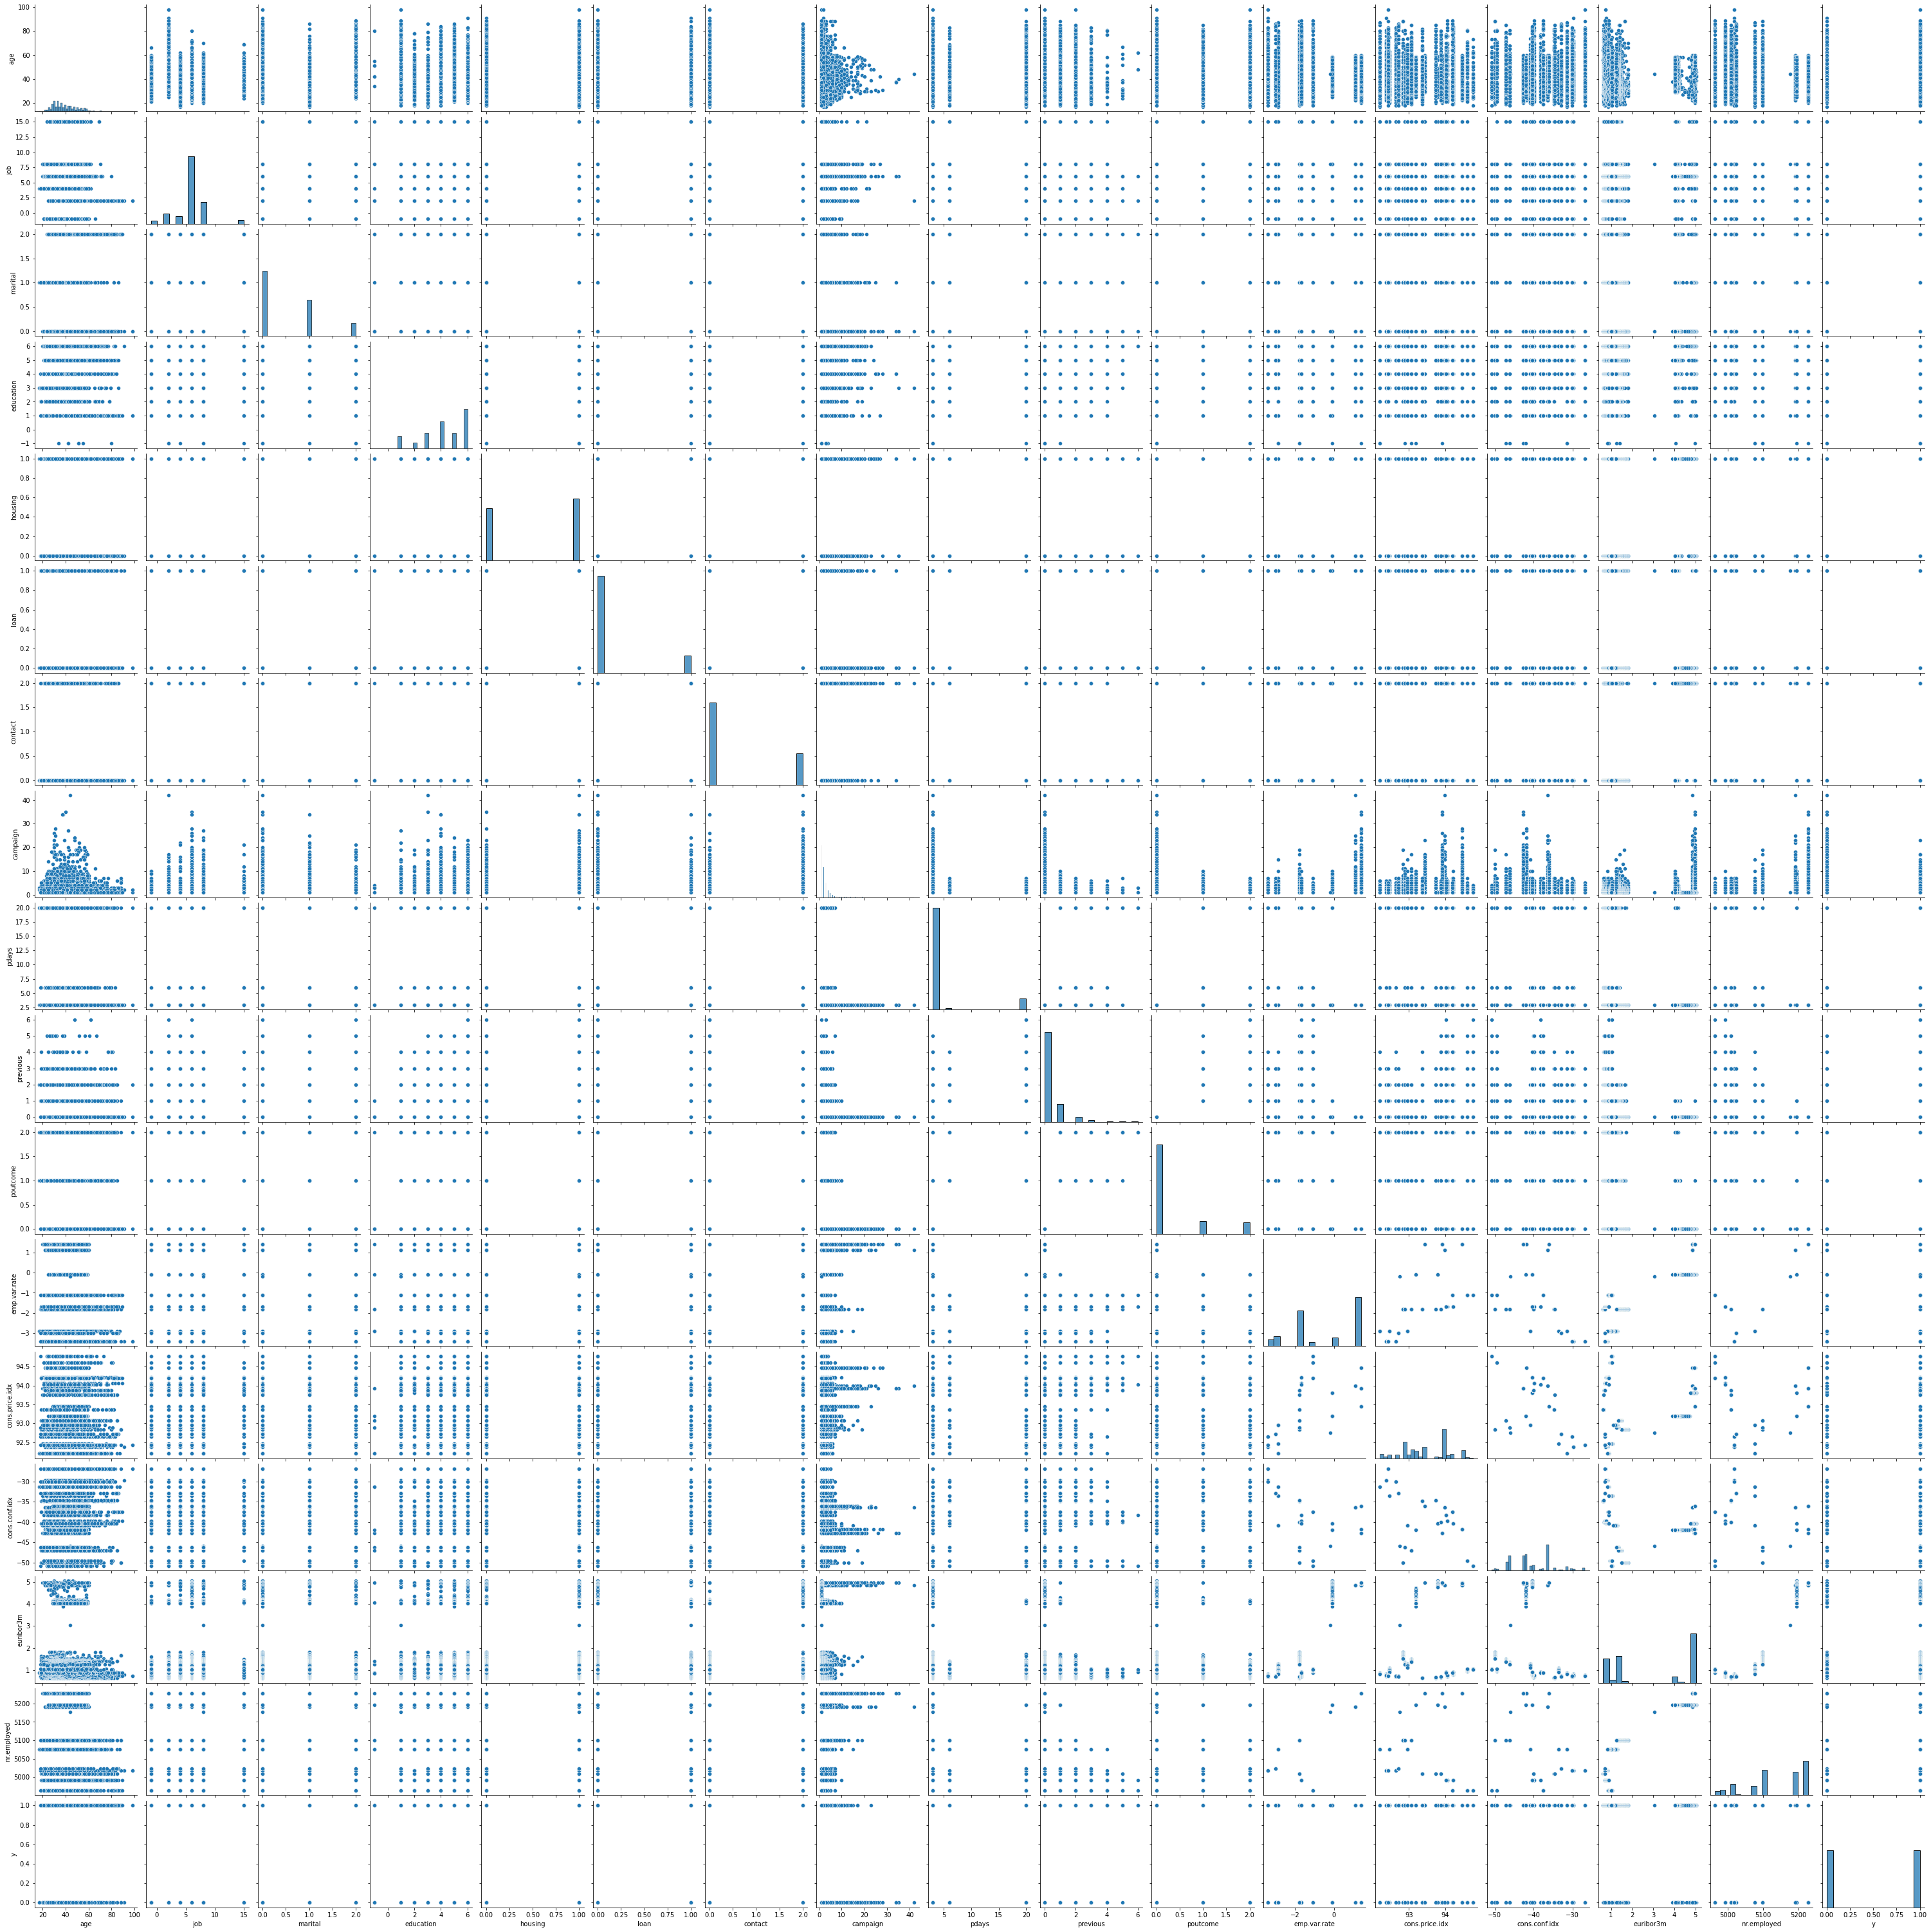

In [18]:
sns.pairplot(data)
plt.show()

In [19]:
corr = data.loc[:, data.columns != "y"].corr()
corr

,age,job,marital,education,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.216871,-0.117816,-0.234546,0.011450,-0.004156,-0.016289,0.000028,0.078514,0.073476,0.082054,-0.071020,-0.034155,0.129927,-0.064924,-0.091460
job,-0.216871,1.000000,-0.035636,-0.012748,-0.005556,-0.014034,0.088277,0.025953,-0.124297,-0.101432,-0.114387,0.148200,0.072055,-0.127451,0.151938,0.179331
marital,-0.117816,-0.035636,1.000000,0.085489,-0.010128,-0.005664,-0.051265,0.001808,0.009695,0.021903,0.017625,-0.042730,-0.015114,-0.047942,-0.052410,-0.046935
education,-0.234546,-0.012748,0.085489,1.000000,0.015259,0.010473,-0.128024,-0.008726,0.057314,0.057779,0.057617,-0.088331,-0.087952,0.053170,-0.082650,-0.084702
housing,0.011450,-0.005556,-0.010128,0.015259,1.000000,0.042179,-0.063343,-0.009528,0.014182,0.013789,0.015962,-0.052268,-0.055005,-0.025082,-0.053052,-0.040066
loan,-0.004156,-0.014034,-0.005664,0.010473,0.042179,1.000000,-0.002485,0.008222,0.002888,0.000555,0.000023,0.004360,0.011673,-0.017334,0.000363,0.000004
contact,-0.016289,0.088277,-0.051265,-0.128024,-0.063343,-0.002485,1.000000,0.121390,-0.148257,-0.211459,-0.227216,0.409504,0.477472,0.146836,0.429676,0.323426
campaign,0.000028,0.025953,0.001808,-0.008726,-0.009528,0.008222,0.121390,1.000000,-0.084449,-0.101149,-0.111179,0.197780,0.134847,-0.027014,0.185520,0.184738
pdays,0.078514,-0.124297,0.009695,0.057314,0.014182,0.002888,-0.148257,-0.084449,1.000000,0.687389,0.833147,-0.320671,-0.047227,0.154850,-0.362552,-0.443458
previous,0.073476,-0.101432,0.021903,0.057779,0.013789,0.000555,-0.211459,-0.101149,0.687389,1.000000,0.843352,-0.382784,-0.066341,0.072166,-0.446917,-0.518739


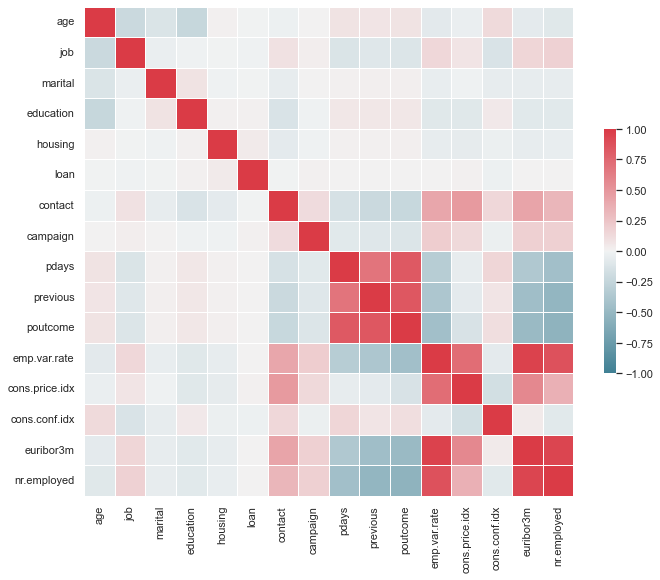

In [20]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

## Modelowanie danych

Dzielimy dane na testowe i treningowe

In [21]:
X = data.loc[:, data.columns != "y"]
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5109, 16) (5109,)
(3407, 16) (3407,)


In [22]:
X_train.head()

,age,job,marital,education,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25892,38,6,0,5,0,0,0,1,3,0,0,-0.1,93.200,-42.0,4.120,5195.8
33775,34,2,1,4,0,0,0,1,3,0,0,-1.8,92.893,-46.2,1.281,5099.1
38338,60,4,0,6,1,0,2,1,3,0,0,-3.4,92.431,-26.9,0.739,5017.5
40557,33,6,0,5,1,0,0,1,3,0,0,-1.1,94.199,-37.5,0.886,4963.6
31583,30,8,1,3,0,1,0,1,3,0,0,-1.8,92.893,-46.2,1.327,5099.1


In [23]:
y_train.head()

25892    1
33775    1
38338    0
40557    1
31583    0
Name: y, dtype: int64

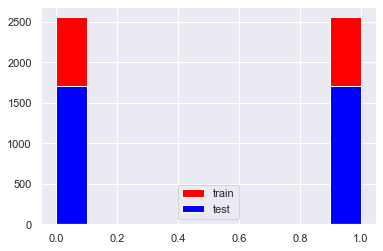

In [24]:
plt.hist(y_train, label="train", color="red")
plt.hist(y_test, label="test", color="blue")
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

import multiprocessing
n_jobs = multiprocessing.cpu_count()-1
max_iter = 10000

### SVC z jądrem linear

In [78]:
pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", max_iter=max_iter, probability=True))])

param_grid_1 = {
            'preprocessing': [StandardScaler()],
            'classifier__gamma': [ 0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_1.fit(X_train, y_train)
grid_1.best_params_


{'classifier__C': 0.001,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler()}

### SVC z jądrem poly

In [79]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", max_iter=max_iter, probability=True))])

param_grid_2 = {'preprocessing': [StandardScaler()],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10],
              'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100],
             'classifier__degree': [1, 2, 3, 4, 5, 6]}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_2.fit(X_train, y_train)
grid_2.best_params_


C:\Users\Pawla\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'classifier__C': 0.01,
 'classifier__coef0': 10,
 'classifier__degree': 4,
 'preprocessing': StandardScaler()}

### SVC z jądrem rbf

In [80]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="rbf", max_iter=max_iter, probability=True))])

param_grid_3 = {
            'preprocessing': [StandardScaler()],
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_3.fit(X_train, y_train)
grid_3.best_params_


C:\Users\Pawla\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'classifier__C': 1, 'preprocessing': StandardScaler()}

### KNeighborsClassifier

In [81]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__p': [1, 10, 20, 100]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__p': 1, 'preprocessing': None}

### DecisionTreeClassifier

In [82]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 3, 6, 10, 20],
            'classifier__criterion':['entropy'],
            'classifier__min_samples_leaf' : [10, 12, 15, 17, 20],
            'classifier__min_samples_split' : [20, 22, 25, 30],
            'classifier__random_state' : [0, 1]
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 10,
 'classifier__min_samples_split': 30,
 'classifier__random_state': 0,
 'preprocessing': StandardScaler()}

### RandomForestClassifier

In [83]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64, 128],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_leaf_nodes': 128,
 'classifier__n_estimators': 50,
 'preprocessing': None}

### BaggingClassifier

In [84]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1]
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_samples': 0.2, 'preprocessing': None}

### ExtraTreesClassifier

In [85]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

### AdaBoostClassifier

In [86]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_9 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 700,
 'preprocessing': StandardScaler()}

### GradientBoostingClassifier

In [87]:
pipeline_10 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_10 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_10 = GridSearchCV(pipeline_10, param_grid_10, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_10.fit(X_train, y_train)
grid_10.best_params_


{'classifier__learning_rate': 0.7,
 'classifier__n_estimators': 10,
 'preprocessing': StandardScaler()}

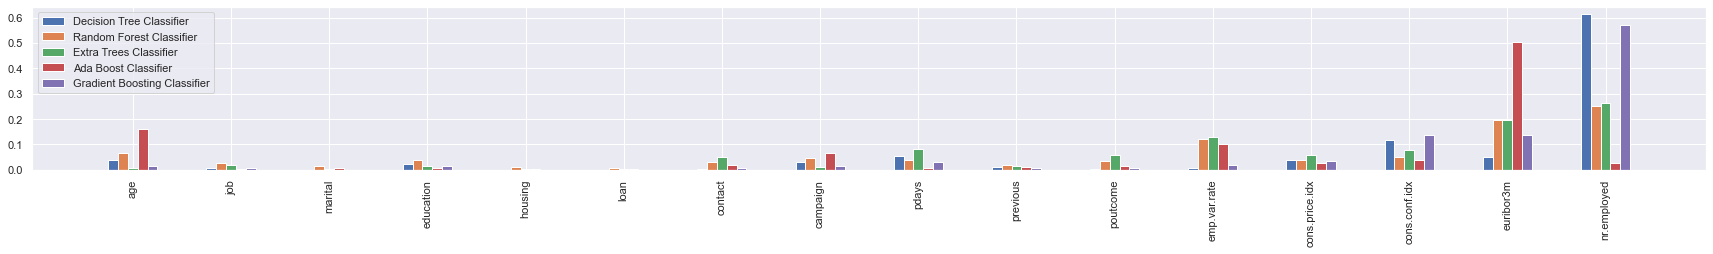

In [88]:

fig, ax = plt.subplots(figsize=(30,3))
objects = list(X_train.columns)
x = np.arange(len(objects))

ax.bar(x-0.2, grid_5.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Decision Tree Classifier")
ax.bar(x-0.1, grid_6.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Random Forest Classifier")
ax.bar(x, grid_8.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Extra Trees Classifier")
ax.bar(x+0.1, grid_9.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Ada Boost Classifier")
ax.bar(x+0.2, grid_10.best_estimator_.named_steps["classifier"].feature_importances_, width=0.1, align='center', label="Gradient Boosting Classifier")

plt.xticks(x, objects, rotation=90)
plt.legend()
plt.show()


In [89]:
from sklearn import metrics

models = []
models.append(('SVC kernel:linear', grid_1.best_estimator_))
models.append(('SVC kernel:poly', grid_2.best_estimator_))
models.append(('SVC kernel:rbf', grid_3.best_estimator_))
models.append(('KNeighborsClassifier', grid_4.best_estimator_))
models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
models.append(('RandomForestClassifier', grid_6.best_estimator_))
models.append(('BaggingClassifier', grid_7.best_estimator_))
models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
models.append(('AdaBoostClassifier', grid_9.best_estimator_))
models.append(('GradientBoostingClassifier', grid_10.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

In [90]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVC kernel:linear', 'SVC kernel:poly', 'SVC kernel:rbf', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                                         'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVC kernel:linear,0.706444,0.694836,0.700592,0.702964,0.760170
1,SVC kernel:poly,0.774729,0.629695,0.694723,0.723217,0.757272
2,SVC kernel:rbf,0.769455,0.620892,0.687236,0.717347,0.761202
3,KNeighborsClassifier,0.703439,0.636150,0.668105,0.683886,0.729855
4,DecisionTreeClassifier,0.825285,0.551643,0.661273,0.717347,0.762112
5,RandomForestClassifier,0.804314,0.612676,0.695536,0.731729,0.780145
6,BaggingClassifier,0.759846,0.577465,0.656219,0.697388,0.748408
7,ExtraTreesClassifier,0.801252,0.600939,0.686787,0.725859,0.782098
8,AdaBoostClassifier,0.797719,0.615610,0.694932,0.729674,0.782075
9,GradientBoostingClassifier,0.793870,0.607981,0.688601,0.724978,0.780848


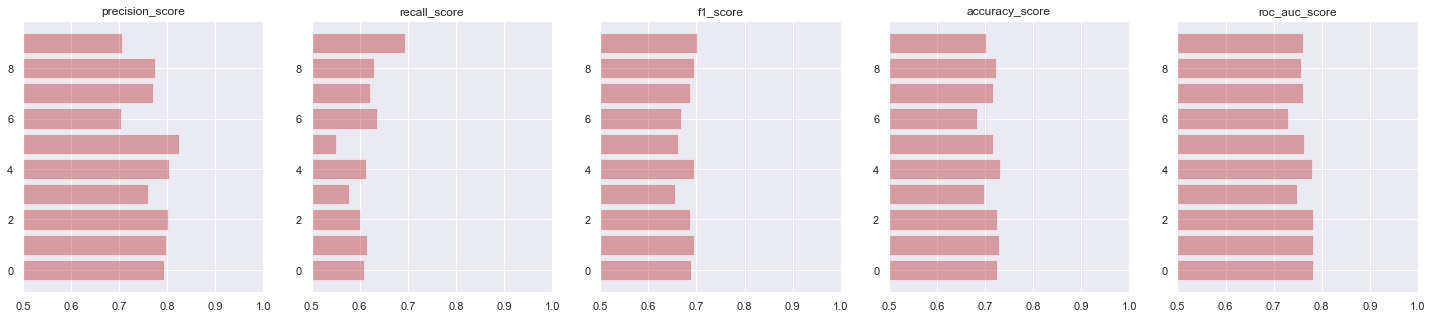

In [91]:
fig, axs = plt.subplots(1, 5, figsize=(25,5), sharey="col")

objects = [name for (name, model) in models]
objects.reverse()
y_pos = np.arange(len(objects))

j = 0

for name in d:
  performance = d[name]
  performance.reverse()
  colors = ['r' if p < 1 else 'b' for p in performance]
  axs[j].barh(y_pos, performance, align='center', alpha=0.5, color=colors)
  axs[j].set_title(name)
  j+=1

for ax in axs:
  ax.set_xlim([0.5, 1])

C:\Users\Pawla\AppData\Local\Temp\ipykernel_24116\855239855.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


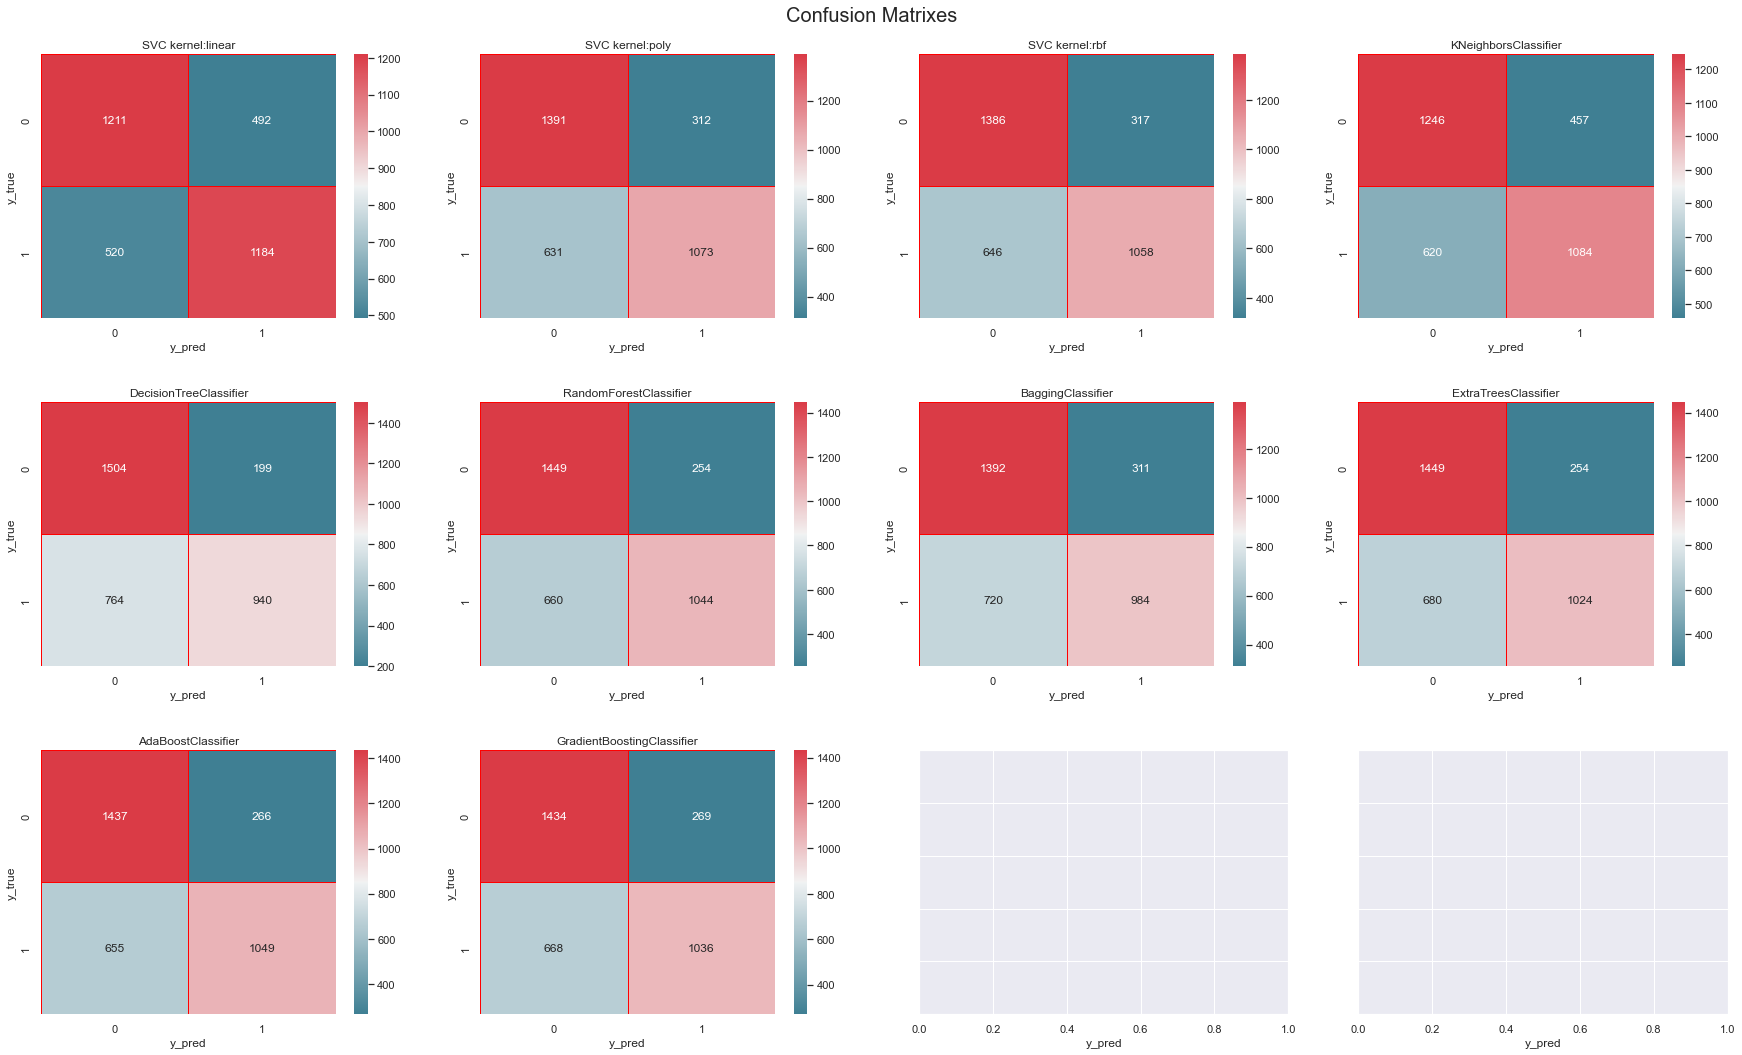

In [92]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(3, 4, figsize=(25,15))

i = 0
j = 0

for name, model in models:
  cm = confusion_matrix(y_test, model.predict(X_test))
  sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",cmap=cmap,fmt=".0f",ax=axs[i,j])
  axs[i,j].set_title(name)
  j=j+1
  if j == 4:
    i=i+1
    j=0

for ax in axs.flat:
    ax.set(xlabel='y_pred', ylabel='y_true')
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle("Confusion Matrixes", fontsize=20, verticalalignment='bottom')
fig.show()


In [25]:
X = dataAll.loc[:, dataAll.columns != "y"]
y = dataAll["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [27]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [29]:
pipeline_11 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_11 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(50, 20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16,32],
}

grid_11 = GridSearchCV(pipeline_11, param_grid_11, cv=kfold, return_train_score=True, n_jobs=n_jobs)

grid_11.fit(X_train, y_train)
grid_11.best_params_


{'classifier__batch_size': 8,
 'classifier__hidden_layer_sizes': (50, 20, 10),
 'classifier__learning_rate_init': 0.01,
 'classifier__max_iter': 100,
 'preprocessing': StandardScaler()}

In [96]:
models.append(('MLP Classifier', grid_11.best_estimator_))
precision_score.append(metrics.precision_score(y_test , models[-1][1].predict(X_test)))
recall_score.append(metrics.recall_score(y_test , models[-1][1].predict(X_test)))
f1_score.append( metrics.f1_score(y_test , models[-1][1].predict(X_test)))
accuracy_score.append(metrics.accuracy_score(y_test , models[-1][1].predict(X_test)))
roc_auc_score.append(metrics.roc_auc_score(y_test , models[-1][1].predict_proba(X_test)[:,1]))



In [97]:
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVC', 'SVC poly', 'LinearSVC', 'KNeighborsClassifier', 'DecisionTreeClassifier',
                                         'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier', 'MLP Classifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVC,0.793870,0.607981,0.688601,0.724978,0.780848
1,SVC poly,0.797719,0.615610,0.694932,0.729674,0.782075
2,LinearSVC,0.801252,0.600939,0.686787,0.725859,0.782098
3,KNeighborsClassifier,0.759846,0.577465,0.656219,0.697388,0.748408
4,DecisionTreeClassifier,0.804314,0.612676,0.695536,0.731729,0.780145
5,RandomForestClassifier,0.825285,0.551643,0.661273,0.717347,0.762112
6,BaggingClassifier,0.703439,0.636150,0.668105,0.683886,0.729855
7,ExtraTreesClassifier,0.769455,0.620892,0.687236,0.717347,0.761202
8,AdaBoostClassifier,0.774729,0.629695,0.694723,0.723217,0.757272
9,GradientBoostingClassifier,0.706444,0.694836,0.700592,0.702964,0.760170


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, SimpleRNN, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.callbacks import History


In [31]:
model = Sequential()

model.add(Dense(units = 6, activation='relu',input_dim = X_train.shape[1]))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size = 16, epochs = 100)


Epoch 1/100
1435/1435 [==============================] - 11s 7ms/step - loss: 0.3397 - accuracy: 0.8834 - val_loss: 0.2920 - val_accuracy: 0.8985
Epoch 2/100
1435/1435 [==============================] - 10s 7ms/step - loss: 0.2850 - accuracy: 0.8985 - val_loss: 0.2866 - val_accuracy: 0.8989
Epoch 3/100
1435/1435 [==============================] - 10s 7ms/step - loss: 0.2821 - accuracy: 0.8992 - val_loss: 0.2851 - val_accuracy: 0.8987
Epoch 4/100
1435/1435 [==============================] - 9s 6ms/step - loss: 0.2808 - accuracy: 0.9001 - val_loss: 0.2854 - val_accuracy: 0.8980
Epoch 5/100
1435/1435 [==============================] - 9s 6ms/step - loss: 0.2805 - accuracy: 0.8998 - val_loss: 0.2841 - val_accuracy: 0.8986
Epoch 6/100
1435/1435 [==============================] - 11s 7ms/step - loss: 0.2800 - accuracy: 0.8992 - val_loss: 0.2850 - val_accuracy: 0.8985
Epoch 7/100
1435/1435 [==============================] - 10s 7ms/step - loss: 0.2796 - accuracy: 0.8999 - val_loss: 0.2847 - v

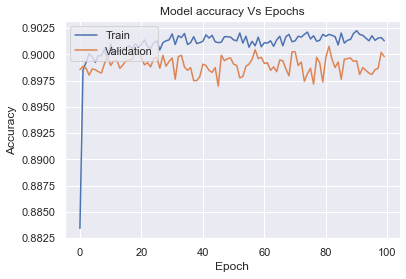

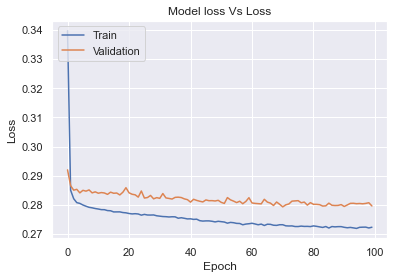

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Podsumowanie

Jak widać, udało nam się stworzyć modele klasyfikacji o niemałej skuteczności. Nasza sieć neuronowa może zostać użyta przy kolejnej kampanii marketingowej, co pozwoli wybrać z dużą precyzją klientów, którzy będą chcieli założyć lokatę w naszym banku